<a href="https://colab.research.google.com/github/spandanag333/ML_Projects/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
  cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target']=cancer.target
df[df.target==1].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [ ]:
df['cancer class']=df.target.apply(lambda x:cancer.target_names[x])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [ ]:
  df[50:55]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.2100,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563,1,benign
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025,1,benign
52,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,0.2273,0.6329,1.520,17.47,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408,1,benign
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,0.8337,1.5930,4.877,98.81,0.003899,0.029610,0.02817,0.009222,0.02674,0.005126,20.60,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987,0,malignant
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.01095,0.001629,18.10,31.69,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873,0,malignant


In [ ]:
df0=df[df.target==0].head(50)
df1=df[df.target==1].head(50)
df0



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.013890,0.003532,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.022500,0.004571,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.059630,0.009208,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.017560,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0,malignant
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.021650,0.005082,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0,malignant
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.013690,0.002179,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0,malignant
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.014860,0.005412,17.06,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0,malignant
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.021430,0.003749,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0,malignant
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.017890,0.010080,15.09,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0,malignant


In [ ]:
y=df.target
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
import matplotlib.pyplot as plt



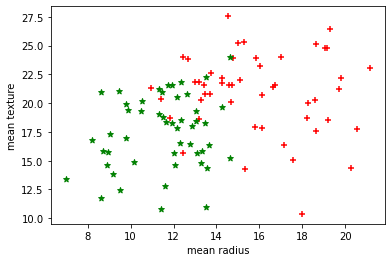

In [ ]:
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(df0['mean radius'],df0['mean texture'],color='red',marker='+')
plt.scatter(df1['mean radius'],df1['mean texture'],color='green',marker='*')

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['target','cancer class'],axis='columns')
y=df.target

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)
  

In [ ]:
len(xtrain)


426

In [ ]:
len(xtest)

143

In [ ]:
from sklearn.svm import SVC
mymodel=SVC()
mymodel.fit(xtrain,ytrain)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
mymodel.score(xtest,ytest)

0.951048951048951

In [ ]:
pred=mymodel.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(ytest,pred))
cm

array([[48,  7],
       [ 0, 88]])

In [ ]:
 model_c=SVC(C=1)
 model_c.fit(xtrain,ytrain)
 model_c.score(xtest,ytest)



0.951048951048951

In [ ]:
model_c=SVC(C=10)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.9440559440559441

In [ ]:
model_c=SVC(C=2)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.958041958041958

### **kernel**

In [ ]:
model_kernel=SVC(kernel='linear')
model_kernel.fit(xtrain,ytrain)
model_kernel.score(xtest,ytest)


0.9790209790209791

In [ ]:
model_kernel=SVC(kernel='poly')
model_kernel.fit(xtrain,ytrain)
model_kernel.score(xtest,ytest)

0.9440559440559441

In [ ]:
model_kernel=SVC(kernel='sigmoid')
model_kernel.fit(xtrain,ytrain)
model_kernel.score(xtest,ytest)


0.4755244755244755

### **list compr**

In [ ]:
squres=[]
for i in range(10):
  squres.append(i*i)
squres


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
squres=[i*i for i in range(10)]
squres

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
#[exprssion for x ion list itterable]

In [ ]:
m=[[j for j in range(5)]for i in range(5)]
print(m)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]


In [ ]:
l=[1,2,3,4]
newl=[i**3 if i%2==0 else i**2 for i in l]
print(newl)

[1, 8, 9, 64]
